# 1. Loading the GTZAN Dataset

In [10]:
import pandas as pd
import os
import sys
import pickle
#importing the dataset
df = pd.read_csv('C:/Users/ASUS/Dropbox/My PC (SHRiX)/Desktop/machine learning/GTZAN Dataset/features_3_sec.csv')
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


# About the Dataset

In [11]:
#(rows,columns)
df.shape

(9990, 60)

In [12]:
df.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

# 2. Data Analysis

In [13]:
#importing the required libraries
import matplotlib.pyplot as plt
import scipy

#defining a standard size for graph plots (plot size)
fig_size=(12,4)

## i. Feature Analysis of audio sample

In [14]:
#libraries for audio analysis
import librosa
import librosa.display

In [15]:
#selecting an audio sample
audio_sample = "C:/Users/ASUS/Dropbox/My PC (SHRiX)/Desktop/machine learning/GTZAN Dataset/genres_original/blues/blues.00000.wav"
#understanding the audio sample
signal,sr = librosa.load(audio_sample, sr=45600) #load audio file with librosa, sr is sampling rate

In [16]:
#audio sample display
import IPython
IPython.display.Audio(signal, rate=sr)

## ii. Visualizing audio sample

### *Plotting raw wav file signal of the audio sample

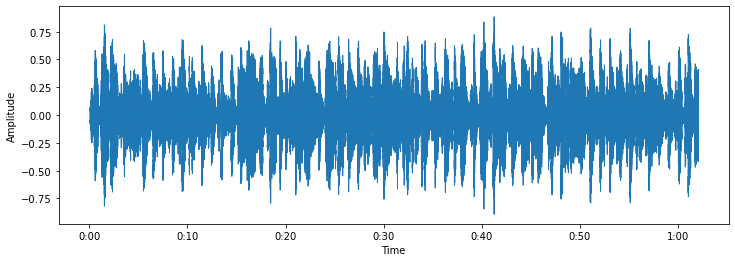

In [17]:
#understanding how the amplitude of the audio sample changes over time
plt.figure(figsize=fig_size)
librosa.display.waveshow(signal)
plt.ylabel("Amplitude")
plt.show()

### *FFT (audio sample) -> Power Spectrum

In [18]:
#importing the required libraries
import numpy as np

#performing the fast fourier transformation to shift the signal from time domain to frequency domain(time stamp is constant)
fft = np.fft.fft(signal)

#calculating the spectrum (mirrored by default due to the fourier transform)
spectrum = np.abs(fft)**2
#calculating the frequency variable
f = np.linspace(0, 45600, len(spectrum))#evenly spaced interval of 45600=sr from 0 to len(spectrum)

#taking the (left)half of the spectrum and half of the frequency
left_spectrum = spectrum[:int(len(spectrum)/2)]
left_f = f[:int(len(spectrum)/2)]



### Plotting the Power Spectrum

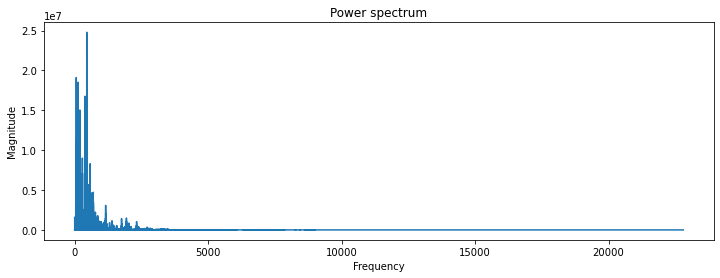

In [19]:
#understanding how the signal's magnitude changes with respect to frequency
#by plotting the power spectrum
plt.figure(figsize=fig_size)
plt.plot(left_f, left_spectrum)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")
plt.show()

### STFT(audio sample) -> Spectrogram

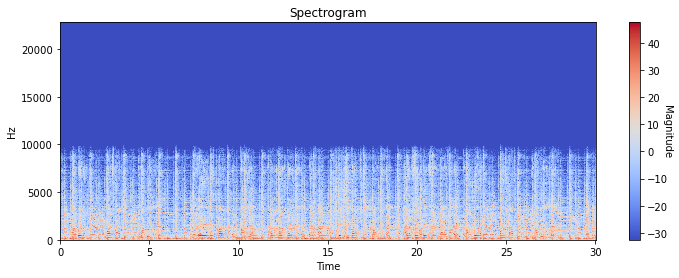

In [20]:
#performing the short-time fourier transformation to analyze the fft signal on different/varying time stamps
#basically loudness of a frequency over time in varying frequencies
stft = librosa.stft(signal)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=fig_size)
librosa.display.specshow(stft_db, sr=45600, x_axis='time', y_axis='hz')
cbar = plt.colorbar()
cbar.set_label('Magnitude', rotation=270)
plt.title("Spectrogram")
plt.show()

### plotting the MFCCs

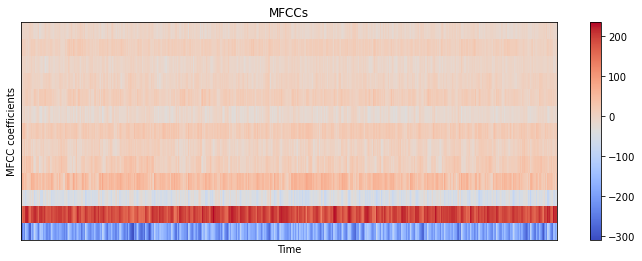

In [21]:
#to ignore warnings
import warnings
warnings.filterwarnings("ignore")
#MFCCs diferentiate between the quality of the sound (example; differentiates between the same notes from piano and guitar)
# extract 13 MFCCs
MFCCs = librosa.feature.mfcc(signal, sr=45600, n_fft=2048, hop_length=512, n_mfcc=13)
# display MFCCs
plt.figure(figsize=fig_size)
librosa.display.specshow(MFCCs, sr=45600, hop_length=512)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")
plt.show()

# 3. Data Preprocessing

## i. Label encoding

In [22]:
#we can't have text in the data if we're going to run a model on it
#Last column of the dataset is Label -> y
y=df.iloc[:,-1]
y

0       blues
1       blues
2       blues
3       blues
4       blues
        ...  
9985     rock
9986     rock
9987     rock
9988     rock
9989     rock
Name: label, Length: 9990, dtype: object

In [23]:
#converting any kind of categorical text (label in this case) into numerical data understood by the model
#importing the required libraries
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)
y #LABELS

array([0, 0, 0, ..., 9, 9, 9])

## ii. Feature Extraction

In [24]:
#taking all the features but the last column i.e; label
x = df.iloc[:,:-1]
#dropping the filenames from the dataframe
x.drop("filename", axis=1, inplace=True) #FEATURES
x

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,...,-2.853603,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,...,4.074709,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,...,4.806280,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,...,-1.359111,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,...,2.092937,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,66149,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,3015.559458,...,5.773784,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969
9986,66149,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,3746.694524,...,2.074155,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033
9987,66149,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,2442.362154,...,-1.005473,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990
9988,66149,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,4313.266226,...,4.123402,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750


## iii. Scaling the features

In [25]:
#Importing the required libraries
from sklearn.preprocessing import StandardScaler
#scaling the input features
X = StandardScaler().fit_transform(np.array(x, dtype=float))
X

array([[ 0.        , -0.48780784,  0.64052047, ..., -0.51356204,
         0.12841417, -0.29178072],
       [ 0.        , -0.40314187,  0.13183473, ...,  1.01138445,
         1.27578001,  0.05642464],
       [ 0.        , -0.36169428,  0.7644909 , ..., -0.04624405,
         0.65390663, -0.52145798],
       ...,
       [ 0.        , -0.35433044,  0.42997426, ..., -0.15370124,
         0.11765485, -0.33882395],
       [ 0.        ,  0.0883611 , -0.00630133, ..., -0.72456977,
         0.30333409, -0.95893743],
       [ 0.        , -0.11321002,  0.19536324, ..., -0.37245283,
        -0.47495901, -0.55112155]])

## -> Splitting the data for training and testing

In [26]:
from sklearn.model_selection import train_test_split
#taking 80% of the data for training & 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# 4. Building the Model

###  Choosing the Model
####  We are going to train the dataset in two different models/algorithms

## i. K-Nearest Neighbors (KNN) 

In [27]:
#importing the required libraries
from sklearn.neighbors import KNeighborsClassifier as knn
#specifying features of knn model: nearest neighbors(n_neighbors), distance calculation metric of the neighbors(metric)
model = knn(n_neighbors = 5, metric = 'euclidean')

### Training the train_data using knn classifier

In [28]:
model.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean')

### Evaluating the Model

In [29]:
train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)
print('Train Accuracy using KNN', train_acc)
print('Test Accuracy using KNN', test_acc)

Train Accuracy using KNN 0.9344344344344344
Test Accuracy using KNN 0.8908908908908909


## ii. Convolutional Neural Networks (CNN)

In [6]:
# importing the libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential

#defining the model
def trainModel(model, epochs, optimizer):
    batch_size = 128
    model.compile(optimizer=optimizer,
                 loss = 'sparse_categorical_crossentropy',
                 metrics = 'accuracy')
    return model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=epochs, batch_size=batch_size)

## model training using CNN

In [51]:
#fitting the CNN model
model = keras.models.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(10, activation='softmax'), 
])

print(model.summary())
model_history = trainModel(model=model, epochs=50, optimizer='adam')

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 256)               15104     
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 dense_15 (Dense)            (None, 10)               

63/63 [==============================] - 0s 4ms/step - loss: 0.1282 - accuracy: 0.9563 - val_loss: 0.3172 - val_accuracy: 0.9074
Epoch 50/50
63/63 [==============================] - 0s 4ms/step - loss: 0.1389 - accuracy: 0.9541 - val_loss: 0.3304 - val_accuracy: 0.9034


### Model Evaluation

Validation history 0.9089089035987854


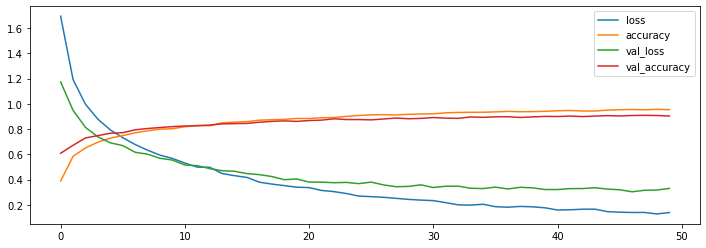

In [52]:
def plotValidate(history):
    print("Validation history", max(history.history["val_accuracy"]))
    pd.DataFrame(history.history).plot(figsize=fig_size)
    plt.show()
    
plotValidate(model_history)

In [53]:
test_loss, test_acc = model.evaluate(X_test, y_test, batch_size=128)
print("TEST LOSS: ",test_loss) #calculating loss
print("TEST ACCURACY: ",test_acc*100) #calculatin accuracy

16/16 [==============================] - 0s 2ms/step - loss: 0.3304 - accuracy: 0.9034
TEST LOSS:  0.3303997218608856
TEST ACCURACY:  90.34034013748169
